# Investigate the main cencerns posed by the NHS

In [1]:
# Libraries and settings needed for analysis
import pandas as pd
import seaborn as sns

# Set figure size.
sns.set(rc={'figure.figsize':(15, 12)})

# Set the plot style as white.
sns.set_style('white')

# Maximum column width to display
pd.options.display.max_colwidth = 200

In [8]:
# Read CSV file from the current working directory.
ar1 = pd.read_csv('appointments_regional.csv')

print(ar1.columns)
print(ar1.dtypes)
print(ar1.shape)
ar1

Index(['icb_ons_code', 'appointment_month', 'appointment_status', 'hcp_type',
       'appointment_mode', 'time_between_book_and_appointment',
       'count_of_appointments'],
      dtype='object')
icb_ons_code                         object
appointment_month                    object
appointment_status                   object
hcp_type                             object
appointment_mode                     object
time_between_book_and_appointment    object
count_of_appointments                 int64
dtype: object
(596821, 7)


,icb_ons_code,appointment_month,appointment_status,hcp_type,appointment_mode,time_between_book_and_appointment,count_of_appointments
0,E54000027,2020-01,Attended,GP,Face-to-Face,Same Day,211265
1,E54000029,2020-01,Attended,GP,Face-to-Face,Same Day,203378
2,E54000027,2020-06,Attended,GP,Telephone,Same Day,191019
3,E54000029,2020-06,Attended,GP,Telephone,Same Day,186344
4,E54000027,2020-02,Attended,GP,Face-to-Face,Same Day,185930
...,...,...,...,...,...,...,...
596816,E54000050,2022-06,DNA,Unknown,Unknown,22 to 28 Days,1
596817,E54000050,2022-06,Unknown,GP,Home Visit,1 Day,1
596818,E54000050,2022-06,Unknown,Other Practice staff,Home Visit,8 to 14 Days,1
596819,E54000050,2022-06,Unknown,Unknown,Telephone,15 to 21 Days,1


# Printing the min and max dates for regional apppointments dataframe.

In [4]:
# Determining the minimum and maximum dates in the ad DataFrame.

# max = Returns max of a column
print(ar1['appointment_month'].max())

# min = Returns min of a column
print(ar1['appointment_month'].min())




2022-06
2020-01


In [6]:
# Determining the minimum and maximum dates in the ad DataFrame.
# grouping the dates with max and min count of appointments on the day.



ar1.groupby('appointment_month').count_of_appointments.agg(
    dates_max=('max'),
    dates_min=('min'),
)

,dates_max,dates_min
appointment_month,,
2020-01,211265,1
2020-02,185930,1
2020-03,148035,1
2020-04,183931,1
2020-05,166953,1
2020-06,191019,1
2020-07,185210,1
2020-08,159642,1
2020-09,184462,1


In [ ]:
# Using DataFrame.filter() method.
df1 = ar1.filter(['appointment_month','count_of_appointments',''], axis=1)

# Should the NHS start looking at increasing staff levels?

In [7]:
# Descriptive statistics.
ar1.describe()



,count_of_appointments
count,596821.000000
mean,1244.601857
std,5856.887042
min,1.000000
25%,7.000000
50%,47.000000
75%,308.000000
max,211265.000000


# Determining the total number of appointments per month.



In [23]:
# Create group 1.
group1 = ar1.groupby(['appointment_mode', 'count_of_appointments','appointment_month'])

# View the DataFrame.
group1
group1.sum() \
.sort_values('appointment_mode',ascending=False)
group1.fillna(0)

,icb_ons_code,appointment_status,hcp_type,time_between_book_and_appointment
0,E54000027,Attended,GP,Same Day
1,E54000029,Attended,GP,Same Day
2,E54000027,Attended,GP,Same Day
3,E54000029,Attended,GP,Same Day
4,E54000027,Attended,GP,Same Day
...,...,...,...,...
596816,E54000050,DNA,Unknown,22 to 28 Days
596817,E54000050,Unknown,GP,1 Day
596818,E54000050,Unknown,Other Practice staff,8 to 14 Days
596819,E54000050,Unknown,Unknown,15 to 21 Days


# Are there significant changes in whether or not visits are attended?

<AxesSubplot:xlabel='appointment_month', ylabel='count_of_appointments'>

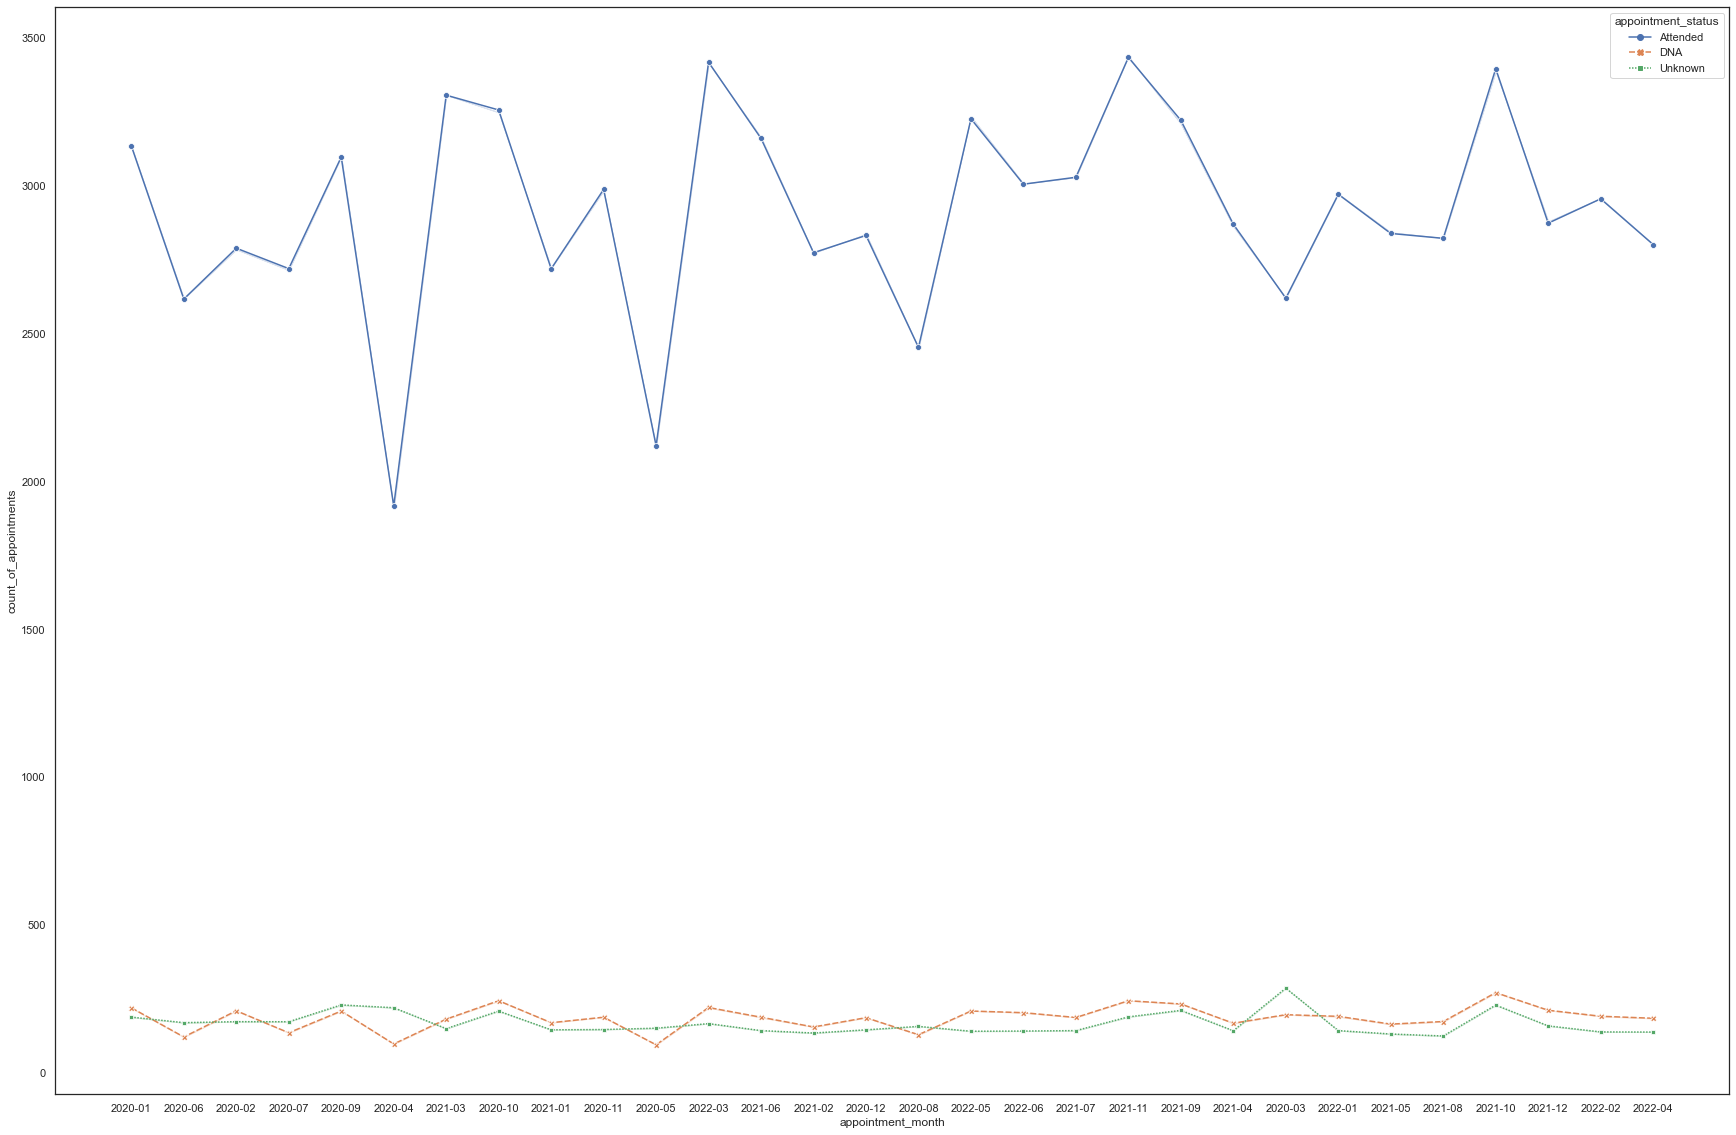

In [30]:
# Libraries and settings needed for analysis
import pandas as pd
import seaborn as sns

# Set figure size.
sns.set(rc={'figure.figsize':(30, 20)})

# Set the plot style as white.
sns.set_style('white')

# Maximum column width to display
pd.options.display.max_colwidth = 200
# Create lineplots with specification.
sns.lineplot(x = 'appointment_month', y = 'count_of_appointments',
             data=ar1[ar1['appointment_status'].isin(['Attended', 'DNA','Unknown'])],
             hue ='appointment_status',style = 'appointment_status', markers=True, ci=0)


# How do the healthcare professional types differ over time?

<AxesSubplot:xlabel='appointment_month', ylabel='appointment_status'>

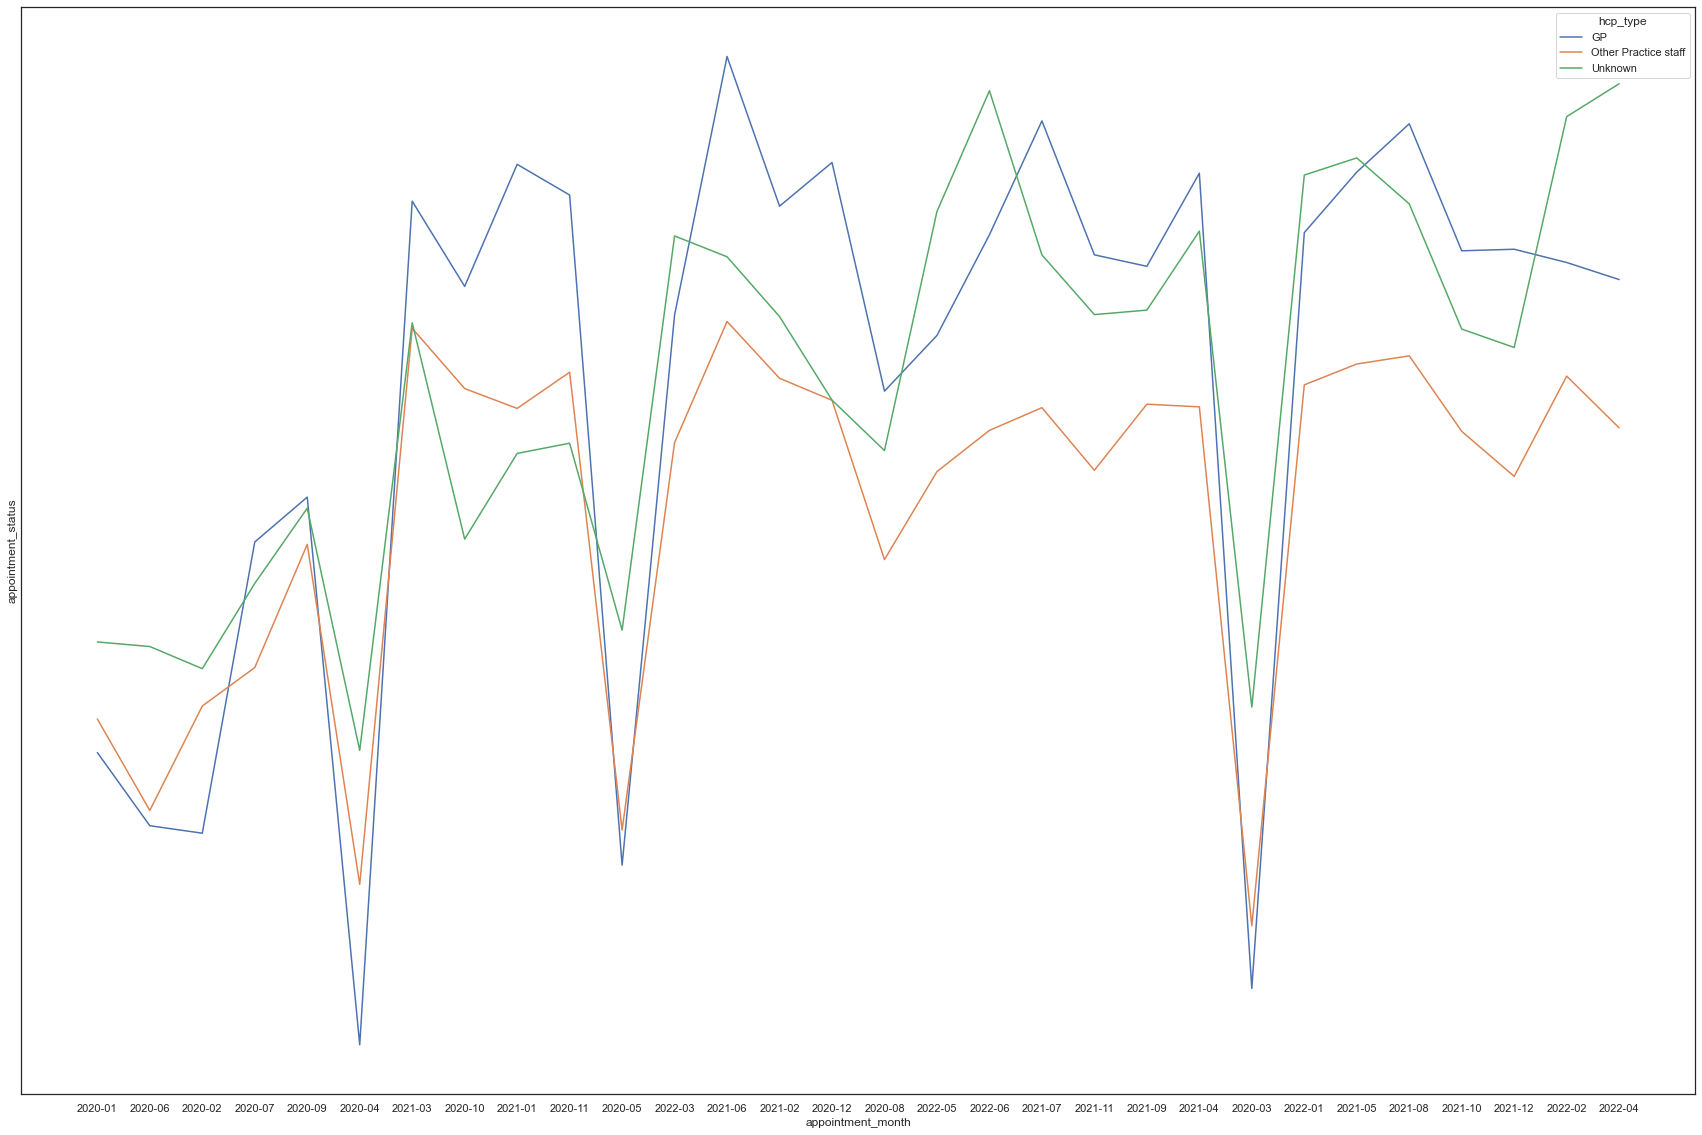

In [36]:
# Libraries and settings needed for analysis
import pandas as pd
import seaborn as sns

# Set figure size.
sns.set(rc={'figure.figsize':(30, 20)})

# Set the plot style as white.
sns.set_style('white')

# Maximum column width to display
pd.options.display.max_colwidth = 200

# Create lineplots with specification.
sns.lineplot(x = 'appointment_month', y = 'appointment_status',
             data=ar1[ar1['hcp_type'].isin(['GP', 'Other Practice staff','Unknown'])],
             hue ='hcp_type',ci=None)

# Are there changes in terms of appointment type and the busiest months?

<AxesSubplot:xlabel='appointment_month', ylabel='appointment_status'>

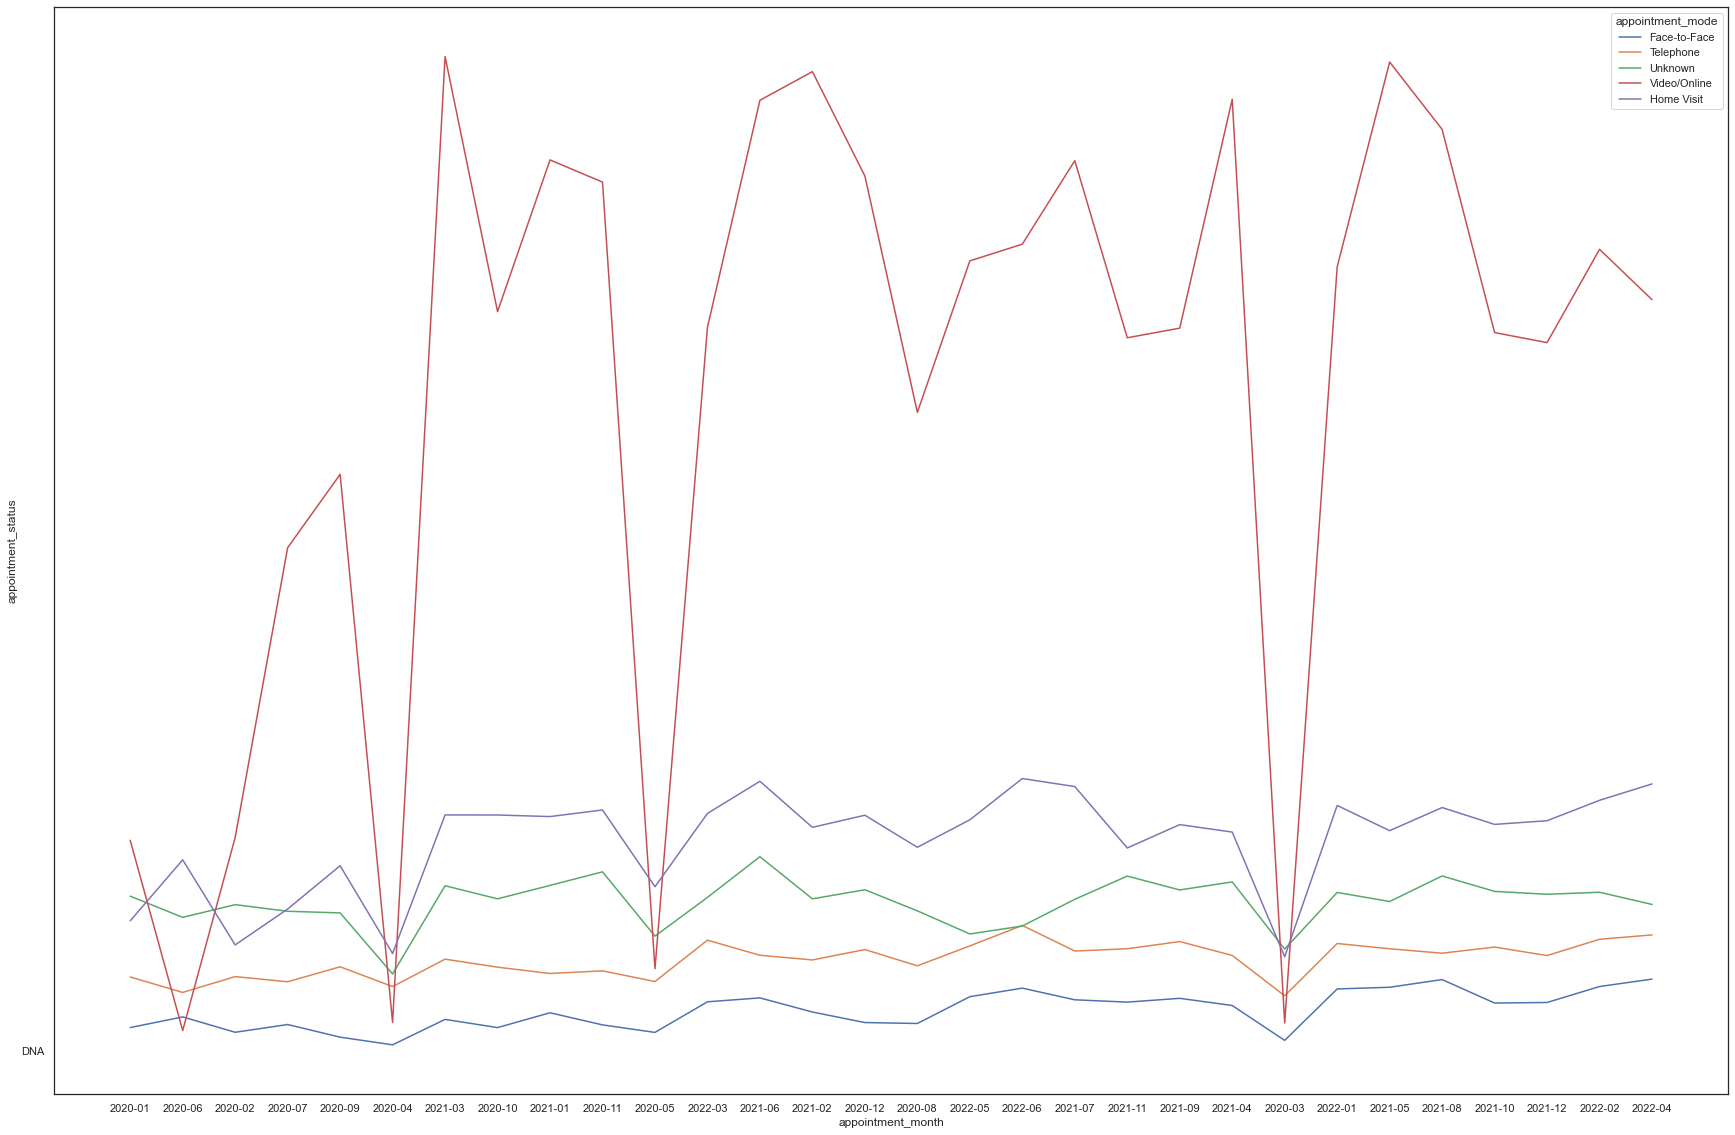

In [38]:
# Libraries and settings needed for analysis
import pandas as pd
import seaborn as sns

# Set figure size.
sns.set(rc={'figure.figsize':(30, 20)})

# Set the plot style as white.
sns.set_style('white')

# Maximum column width to display
pd.options.display.max_colwidth = 200

# Create lineplots with specification.
sns.lineplot(x = 'appointment_month', y = 'appointment_status',
             data=ar1[ar1['appointment_mode'].isin(['Face-to-Face', 'Telephone','Home Visit','Unknown','Video/Online'])],
             hue ='appointment_mode',ci=None)

# Are there any trends in time between booking an appointment?

<AxesSubplot:xlabel='appointment_month', ylabel='appointment_status'>

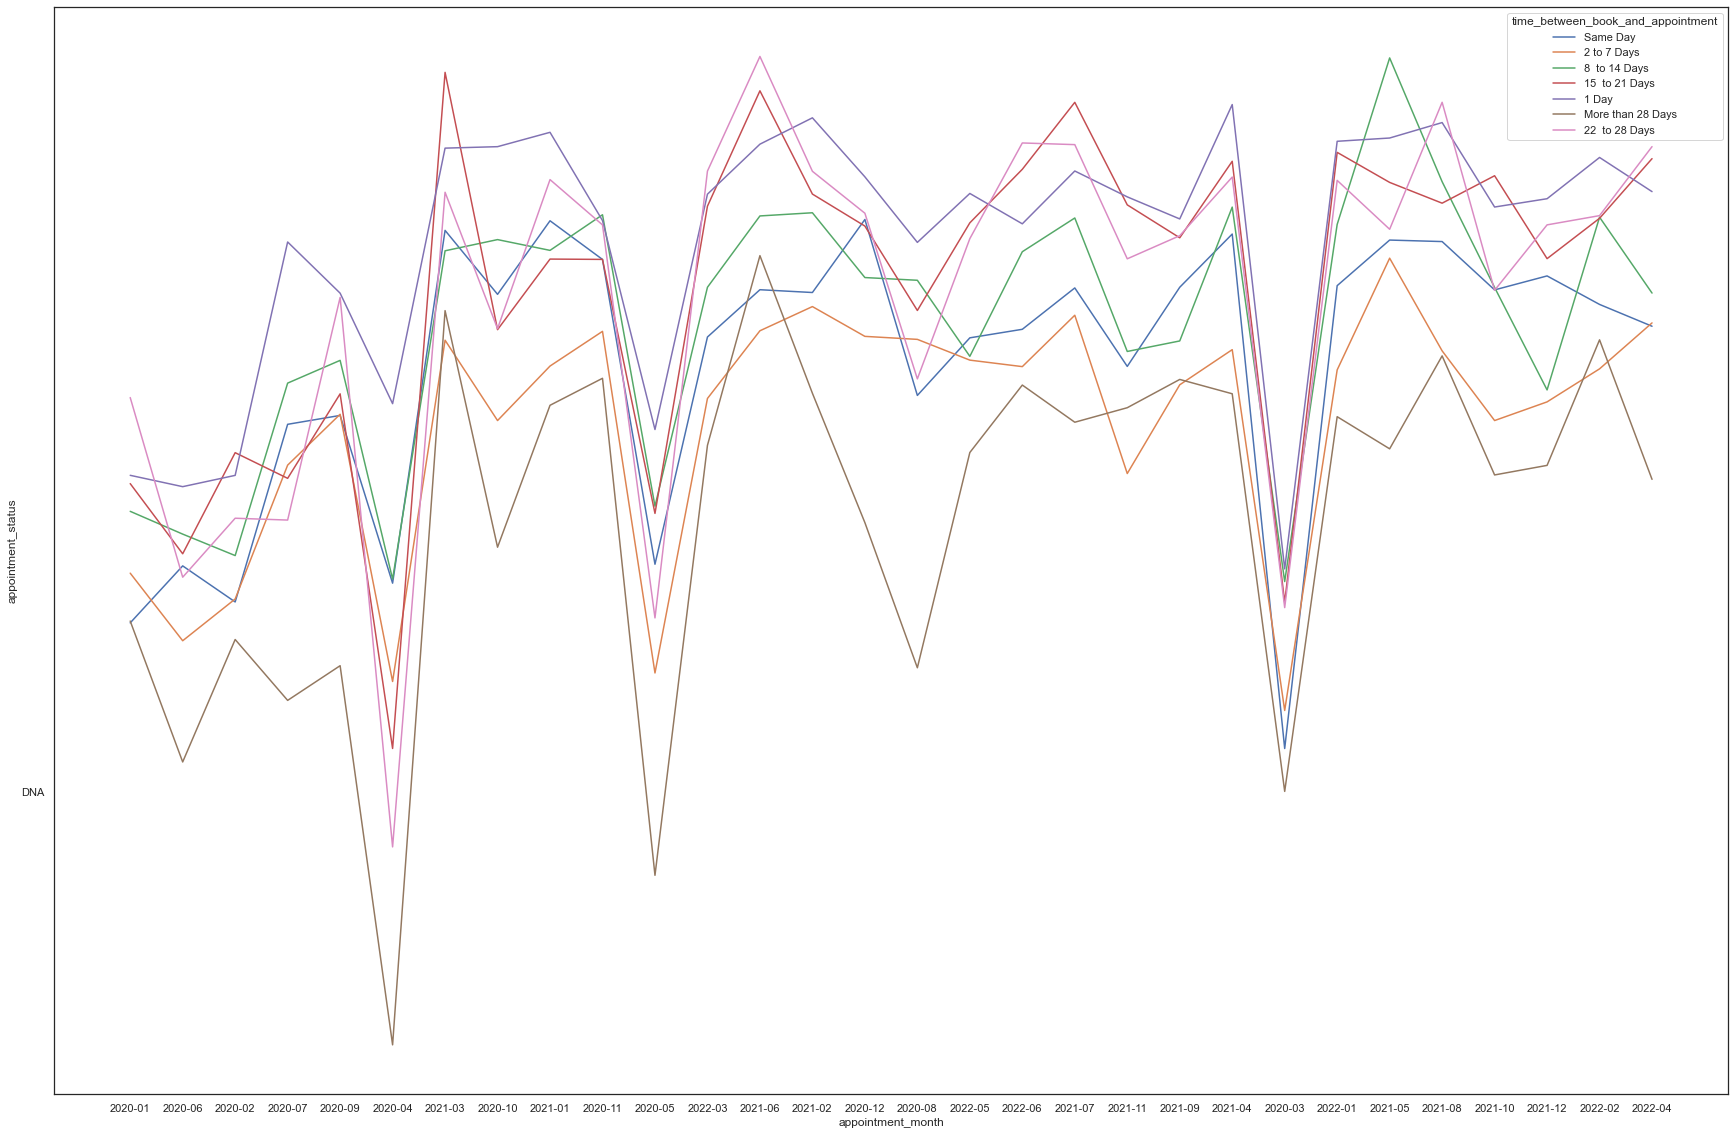

In [40]:
# Libraries and settings needed for analysis
import pandas as pd
import seaborn as sns

# Set figure size.
sns.set(rc={'figure.figsize':(30, 20)})

# Set the plot style as white.
sns.set_style('white')

# Maximum column width to display
pd.options.display.max_colwidth = 200

# Create lineplots with specification.
sns.lineplot(x = 'appointment_month', y = 'appointment_status',
             data=ar1[ar1['time_between_book_and_appointment'].isin(['Same Day','1 Day','2 to 7 Days','8  to 14 Days','15  to 21 Days','22  to 28 Days','More than 28 Days'])],
             hue ='time_between_book_and_appointment',ci=None)


# How do the spread of service settings compare?

In [41]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt



In [42]:
df=pd.read_excel("national_categories.xlsx")


In [43]:
dff=df.groupby(["appointment_month"]).sum("count_of_appointments")


In [44]:
dff

,count_of_appointments
appointment_month,
2021-08,23852171
2021-09,28522501
2021-10,30303834
2021-11,30405070
2021-12,25140776
2022-01,25635474
2022-02,25355260
2022-03,29595038
2022-04,23913060


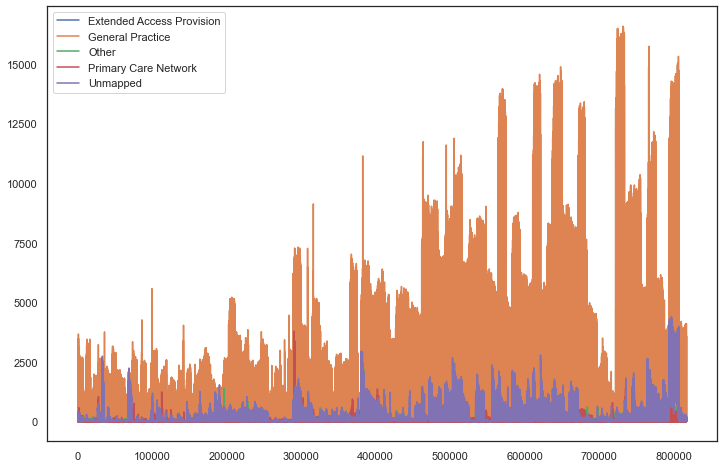

In [54]:
# Libraries and settings needed for analysis
import pandas as pd
import seaborn as sns

# Set figure size.
sns.set(rc={'figure.figsize':(15, 12)})

# Set the plot style as white.
sns.set_style('white')

# Maximum column width to display
pd.options.display.max_colwidth = 200

#All in one
df.groupby('service_setting')['count_of_appointments'].plot(legend='True',figsize=(12,8))
plt.show()

Primary Care Network


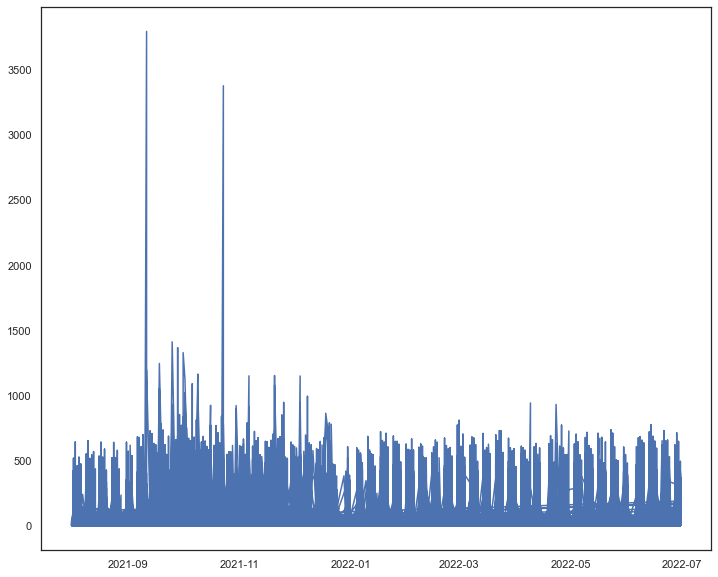

Other


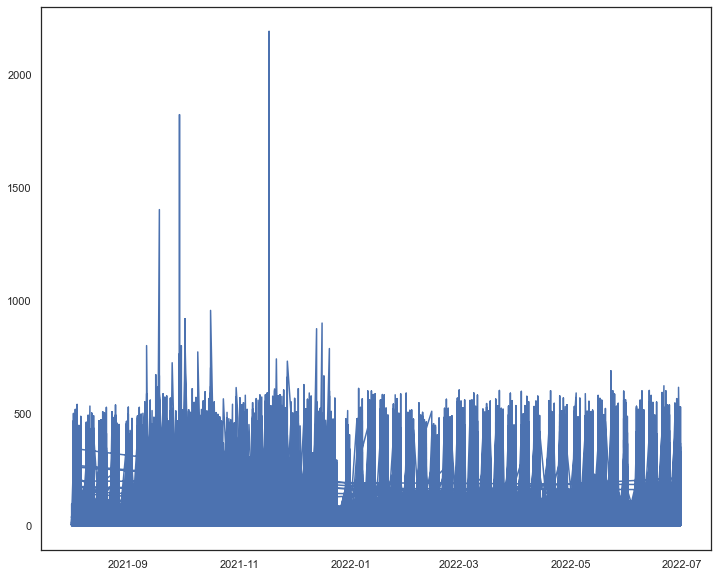

General Practice


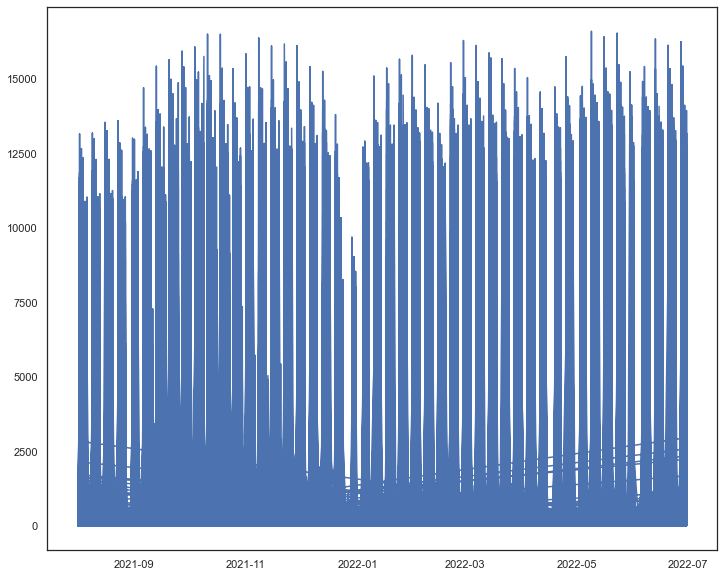

Unmapped


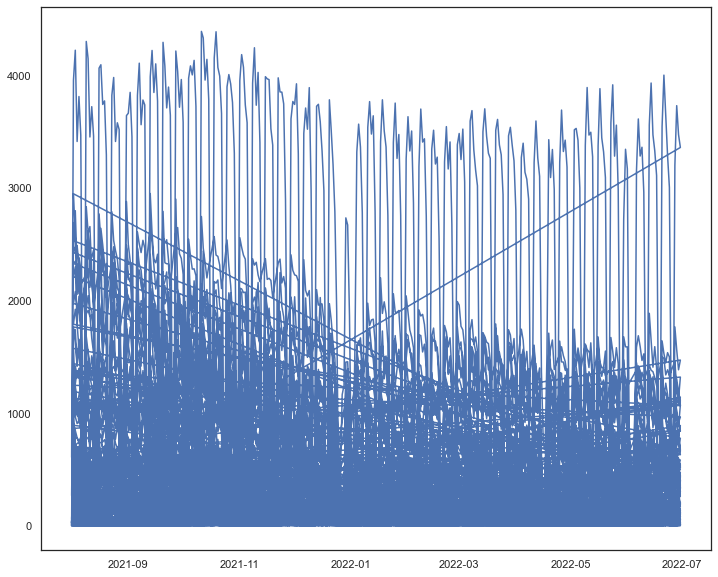

Extended Access Provision


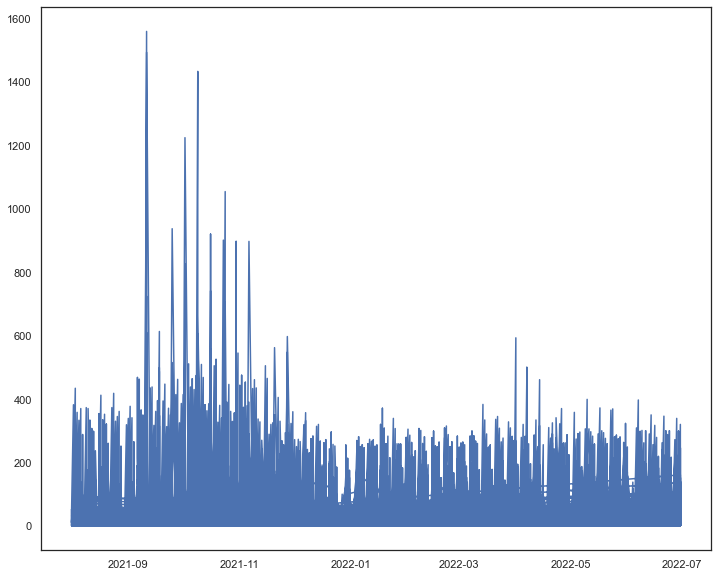

In [53]:
# Libraries and settings needed for analysis
import pandas as pd
import seaborn as sns

# Set figure size.
sns.set(rc={'figure.figsize':(12, 10)})

# Set the plot style as white.
sns.set_style('white')

# Maximum column width to display
pd.options.display.max_colwidth = 200


#Multiple graphs
listOfUniques = df['service_setting'].unique()
for unique in listOfUniques:
        tempdf = df[ df['service_setting'] == unique]
        print(unique)
        plt.plot(tempdf['appointment_date'], tempdf['count_of_appointments'], label=unique,)
        plt.show()